# Numerical Simulation Laboratory

# Numerical exercise 5 

## Exercise 05.1
Svilppo l'algoritmo di Metropolis per campionare le densità di probabilità corrispondenti al modulo quadro delle autofunzioni dell'atomo di idrogeno qui riportate con il valore medio atteso espresso in unità del *raggio di Bohr* $a_0$:

- **Autostato** $n=1$, $l=0$, $m=0$
    $$\Psi_{1,0,0}(r,\theta,\phi) = \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}  \quad \quad \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
 $$

- **Autostato** $n=2$, $l=1$, $m=0$ 
    $$\Psi_{2,1,0}(r,\theta,\phi) = \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta) \quad \quad \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
$$

Effettuo il campionamento di entrambe le densità di probabilità utilizzando una probabilità di transizione uniforme e una normale multivariata. Prima di ogni simulazione effettuo una equilibrazione del sistema volta a determinare il valore del $\delta$ necessario per avere un'accettanza pari circa al 50% e rendere l'algoritmo sufficientemente efficiente.

### <font color='blue'> Probabilità Uniforme </font>
Effettuo il campionamento delle due densità di probabilità utilizzando le coordinate cartesiane e sfruttando una probabilità di transizione uniforme centrata nella posizione di partenza di ogni step e con un intervallo di larghezza pari a $\delta_{\psi}$. Ogni posizione successiva è quindi determinata come:

- $x_{n+1} = x_{n} + U(-\delta_{\psi}, \delta_{\psi})$
- $y_{n+1} = y_{n} + U(-\delta_{\psi}, \delta_{\psi})$
- $z_{n+1} = z_{n} + U(-\delta_{\psi}, \delta_{\psi})$

dove $U(-\delta_{\psi}$, $\delta_{\psi})$ indica un numero casuale uniformemente distribuito nell'intervallo $[-\delta_{\psi}, \delta_{\psi}]$. Per determinare il valore di $\delta_{\Psi}$, diverso per le due autofunzioni, lancio il programma varie volte con un numero di passi limitato a $10^4$ e stimo il rapporto tra il numero di step accettati e il numero di step totali. In questo modo posso calibrare il sistema e determinare l'ampiezza dell'intervallo che mi consente di ottenere un'efficenza del 50%, ottenendo così $\delta_{\Psi} = 1.2$ per l'autostato $\Psi_{100}$ e $\delta_{\Psi} = 3.15$ per l'autostato $\Psi_{210}$.

Utilizzando tale probabilità di transizione effettuo il campionamento delle due densità di probabilità e stimo il valor medio delle distanze dei punti ottenuti dall'origine. Per il calcolo del valore medio utilizzo il metodo delle **medie a blocchi** e in particolare suddivido la simulazione in $500$ blocchi di $2 \times 10^4$ step ciascuno. I grafici seguenti mostrano i risultati ottenuti prendendo come punto di partenza dell'algoritmo 
due punti con **probabilità massima**, ovvero con modulo pari a $\frac{3}{2}a_0$ per $\Psi_{100}$ e pari a $5a_0$ per $\Psi_{210}$. Come è possibile osservare, i valori medi convergono al risultato atteso per entrambe le autofunzioni. Il plot successivo mostra una distribuzione nello spazio tridimensionale di 2000 punti soddisfacenti le densità di probabilità campionate, le cui coordinate sono state determinate durante il procedimento.

Risultato analitico 1.5
Valore finale della simulazione 1.50101671


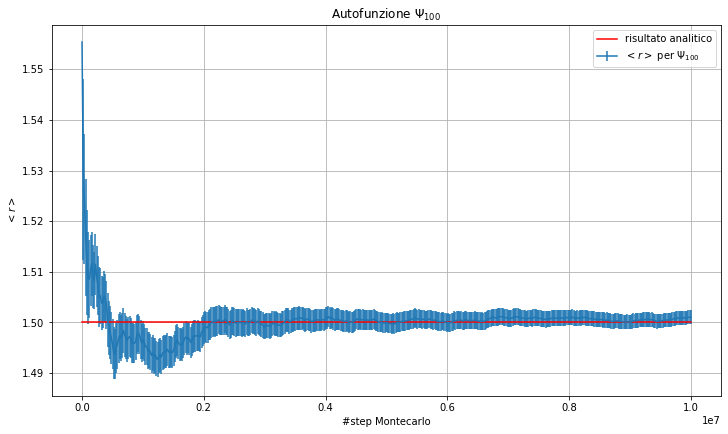

Risultato analitico 5.0
Valore finale della simulazione 4.99287472


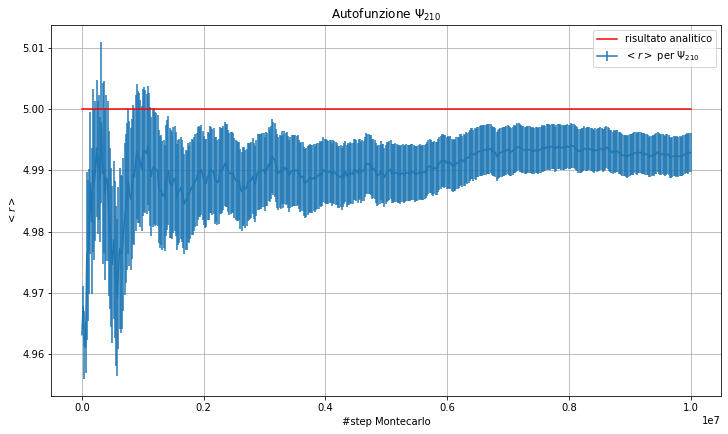

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,500,500) #blocchi
x *= 20000 #step in ogni blocco
y100 = 1.5*x**0
y210 = 5*x**0

r100, e100= np.loadtxt('./Files/unif100.out', delimiter = '  ', unpack = 'True')
r210, e210= np.loadtxt('./Files/unif210.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(12, 15))
print("Risultato analitico", y100[0])
print("Valore finale della simulazione", r100[len(r100)-1])
plt.subplot(211)
plt.plot(x,y100, color='red', label="risultato analitico") #grafico valore atteso
plt.errorbar(x, r100, yerr=e100, label='$<r>$ per $\Psi_{100}$') #grafico simulazione
plt.title("Autofunzione $\Psi_{100}$")
plt.xlabel('#step Montecarlo')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 15))
print("Risultato analitico", y210[0])
print("Valore finale della simulazione", r210[len(r210)-1])
plt.subplot(212)
plt.errorbar(x, r210, yerr=e210, label="$<r>$ per $\Psi_{210}$") #grafico simulazione
plt.plot(x,y210, color='red', label="risultato analitico") #grafico valore atteso
plt.title("Autofunzione $\Psi_{210}$")
plt.xlabel('#step Montecarlo')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

plt.show()

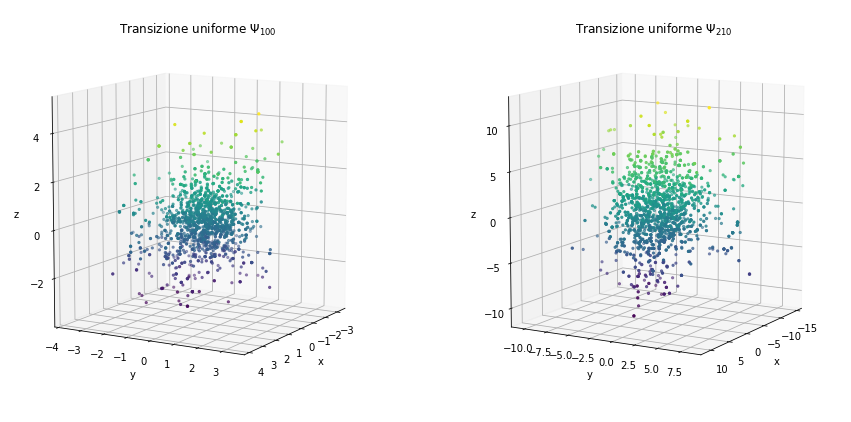

In [2]:
from mpl_toolkits.mplot3d import Axes3D

M = 2000 #numero di punti che voglio graficare (max 10'000)
fig=plt.figure(figsize=(15,7.5))

#grafico uniforme n=1, l=0, m=0
X, Y, Z = np.loadtxt('./Files/Points/unif100.out', delimiter='  ', unpack=True, max_rows=M)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Transizione uniforme $\Psi_{100}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

#grafico uniforme n=2, l=1, m=0
X, Y, Z = np.loadtxt('./Files/Points/unif210.out', delimiter='  ', unpack=True, max_rows=M)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Transizione uniforme $\Psi_{210}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

### <font color='blue'> Probabilità Normale </font>

Effettuo il campionamento delle due densità di probabilità utilizzando le coordinate cartesiane e sfruttando una probabilità di transizione normale multivariata centrata nella posizione di partenza di ogni step e con una larghezza pari a $\delta_{\psi}$. Ogni posizione successiva è quindi determinata come:

- $x_{n+1} = \mathcal{N}(x_n, \delta_{\psi})$
- $y_{n+1} = \mathcal{N}(y_n, \delta_{\psi})$
- $z_{n+1} = \mathcal{N}(z_n, \delta_{\psi})$

dove $\mathcal{N}(\mu, \sigma)$ indica un numero casuale generato con una distribuzione normale di media $\mu$ e larghezza $\sigma$. Per determinare il valore di $\delta_{\Psi}$, diverso per le due autofunzioni, lancio il programma varie volte con un numero di passi limitato a $10^4$ e stimo il rapporto tra il numero di step accettati e il numero di step totali. In questo modo posso calibrare il sistema e determinare la larghezza della gaussiana che mi consente di ottenere un'efficenza del 50%, ottenendo così $\delta_{\Psi} = 0.75$ per l'autostato $\Psi_{100}$ e $\delta_{\Psi} = 1.95$ per l'autostato $\Psi_{210}$.

Utilizzando tale probabilità di transizione effettuo il campionamento delle due densità di probabilità e stimo il valor medio delle distanze dei punti ottenuti dall'origine. Per il calcolo del valore medio utilizzo il metodo delle **medie a blocchi** e in particolare suddivido la simulazione in $500$ blocchi di $2 \times 10^4$ step ciascuno. I grafici seguenti mostrano i risultati ottenuti prendendo come punto di partenza dell'algoritmo 
due punti con **probabilità massima**, ovvero con modulo pari a $\frac{3}{2}a_0$ per $\Psi_{100}$ e pari a $5a_0$ per $\Psi_{210}$. Come è possibile osservare, i valori medi convergono al risultato atteso per entrambe le autofunzioni. Il plot successivo mostra una distribuzione nello spazio tridimensionale di 2000 punti soddisfacenti le densità di probabilità campionate, le cui coordinate sono state determinate durante il procedimento.

Risultato analitico 1.5
Valore finale della simulazione 1.49826544


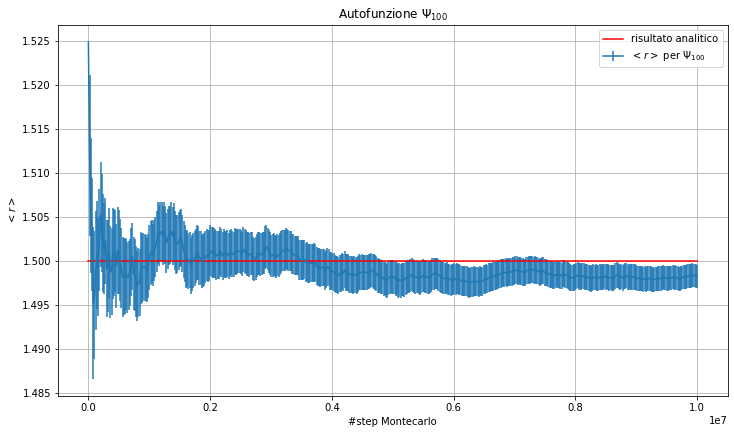

Risultato analitico 5.0
Valore finale della simulazione 5.00229928


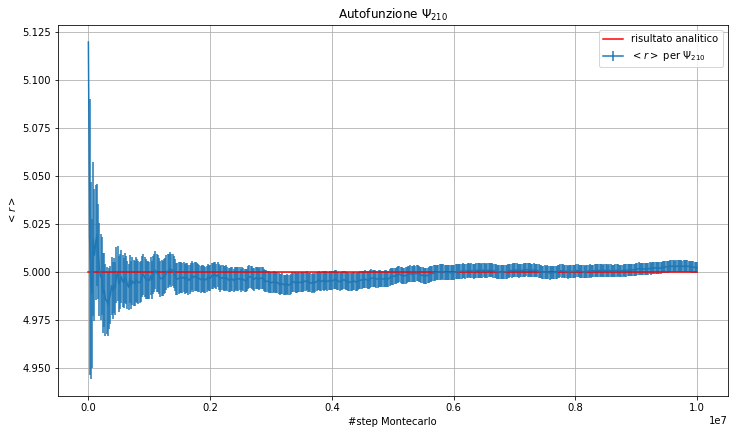

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,500,500) #blocchi
x *= 20000 #step in ogni blocco
y100 = 1.5*x**0
y210 = 5*x**0

r100, e100= np.loadtxt('./Files/gauss100.out', delimiter = '  ', unpack = 'True')
r210, e210= np.loadtxt('./Files/gauss210.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(12, 15))
print("Risultato analitico", y100[0])
print("Valore finale della simulazione", r100[len(r100)-1])
plt.subplot(211)
plt.plot(x,y100, color='red', label="risultato analitico") #grafico valore atteso
plt.errorbar(x, r100, yerr=e100, label='$<r>$ per $\Psi_{100}$') #grafico simulazione
plt.title("Autofunzione $\Psi_{100}$")
plt.xlabel('#step Montecarlo')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 15))
print("Risultato analitico", y210[0])
print("Valore finale della simulazione", r210[len(r210)-1])
plt.subplot(212)
plt.errorbar(x, r210, yerr=e210, label="$<r>$ per $\Psi_{210}$") #grafico simulazione
plt.plot(x,y210, color='red', label="risultato analitico") #grafico valore atteso
plt.title("Autofunzione $\Psi_{210}$")
plt.xlabel('#step Montecarlo')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)
plt.show()

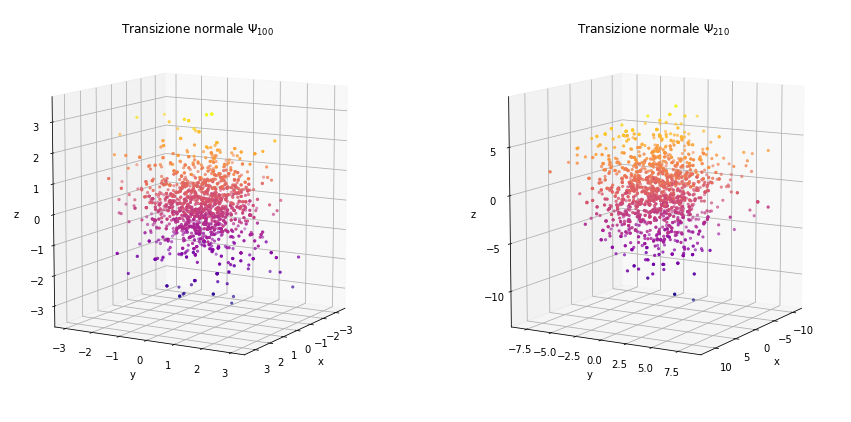

In [4]:
from mpl_toolkits.mplot3d import Axes3D

M = 2000 #numero di punti che voglio graficare (max 10'000)
fig=plt.figure(figsize=(15,7.5))

#grafico uniforme n=1, l=0, m=0
X, Y, Z = np.loadtxt('./Files/Points/gauss100.out', delimiter='  ', unpack=True, max_rows=M)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.', cmap='plasma')
ax.set_title('Transizione normale $\Psi_{100}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

#grafico uniforme n=2, l=1, m=0
X, Y, Z = np.loadtxt('./Files/Points/gauss210.out', delimiter='  ', unpack=True, max_rows=M)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.', cmap='plasma')
ax.set_title('Transizione normale $\Psi_{210}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()